# Clustering On Car MPG Data Set

In [53]:
#to enable plotting in the Jupyter notebook

%matplotlib inline

In [66]:
import numpy as np

from sklearn.model_selection import train_test_split

#import linear Regression machine learning Library

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

#to handle the data in rows and columns

import pandas as pd

#importng plotting libraries

import matplotlib.pyplot as plt

# Importing seaborn for statistical plots

import seaborn as sns



In [67]:
car_mpg_df = pd.read_csv('car-mpg.csv')

In [68]:
#check the few data sets to understand the data
car_mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [73]:
car_mpg_df.describe().transpose()
car_name = car_mpg_df['car_name']
car_mpg_df = car_mpg_df.drop('car_name', axis=1)
car_mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [74]:
# horsepower is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(car_mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['hp'] == False]   # from temp take only those rows where hp has false

# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
car_mpg_df = car_mpg_df.replace('?', np.nan)
car_mpg_df = car_mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


#converting the hp column from object / string type to float
car_mpg_df['hp'] = car_mpg_df['hp'].astype('float64')  

In [75]:
car_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [76]:
car_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


# Lets do Pairplot analysis to visualy check the number of likely clusters

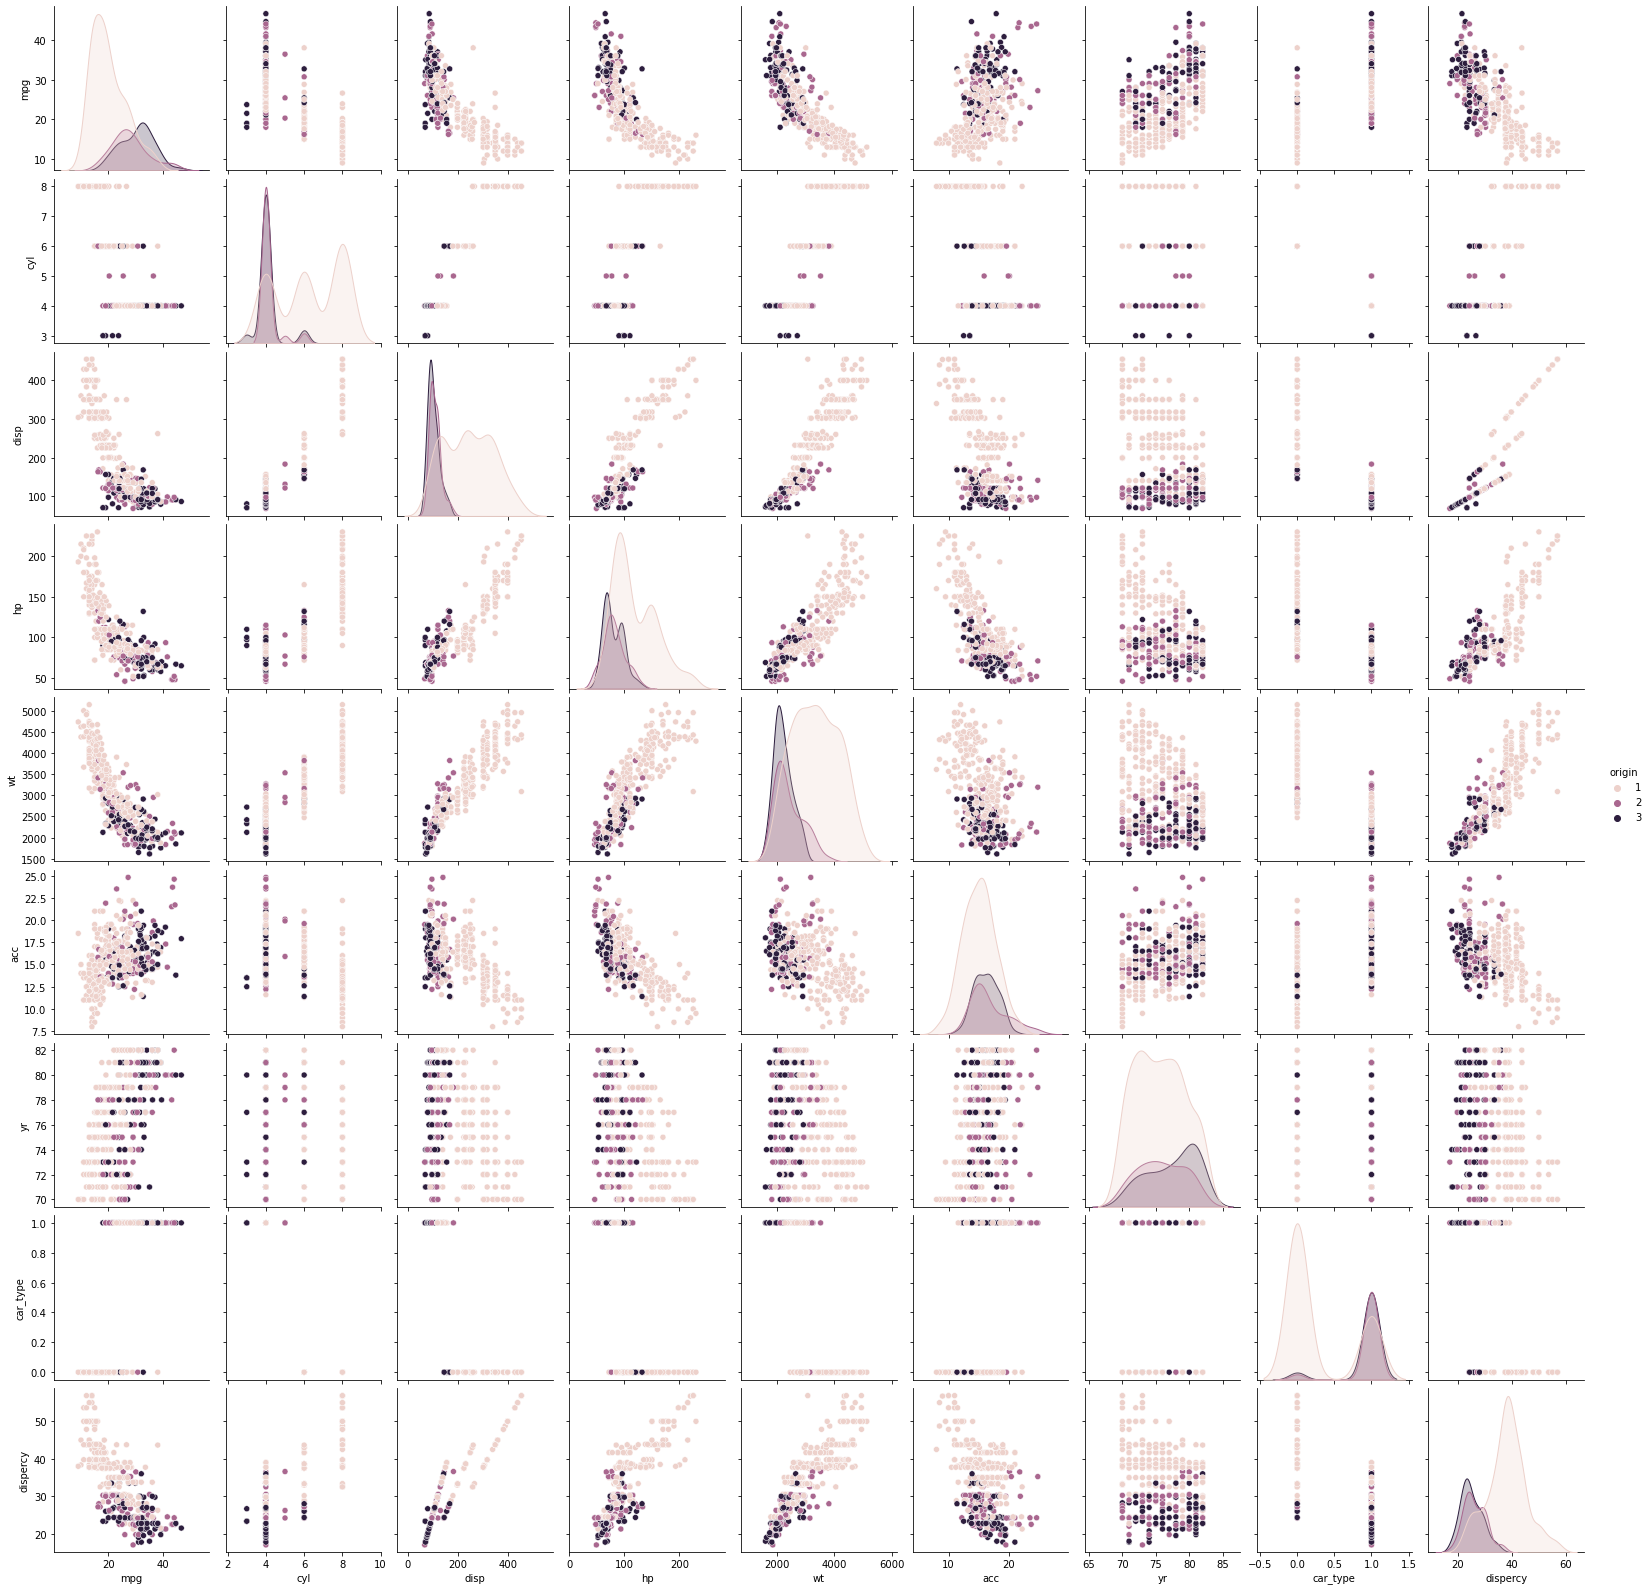

In [77]:
car_mpg_df_attr = car_mpg_df.iloc[:,0:9]
car_mpg_df_attr ['dispercy']=car_mpg_df_attr['disp']/car_mpg_df_attr['cyl']
sns.pairplot(car_mpg_df_attr, diag_kind='kde', hue='origin')

In [78]:
from scipy.stats import zscore

car_mpg_df_attr = car_mpg_df.loc[:,'mpg':'origin']
car_mpg_df_attr_z= car_mpg_df_attr.apply(zscore)

car_mpg_df_attr_z.pop('origin')
car_mpg_df_attr_z.pop('yr')

array = car_mpg_df_attr_z.values
car_mpg_df_attr

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


# KMeans Clustering 

In [89]:
cluster_range= range (2, 6)

cluster_errors= []
for num_cluster in cluster_range:
    clusters= KMeans(num_cluster, n_init=5)
    clusters.fit(car_mpg_df_attr)
    labels = clusters.labels_
    centriods =clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428960e+07
1,3,3.420817e+07
2,4,1.905669e+07
3,5,1.377345e+07


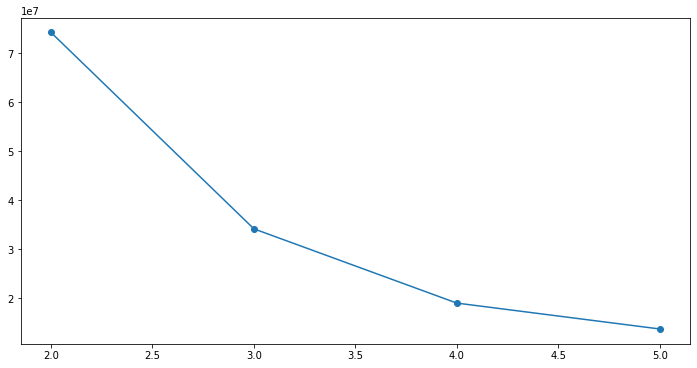

In [90]:
#Elbow Plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')


In [91]:
cluster = KMeans (n_clusters= 4, random_state= 2354)

cluster.fit(car_mpg_df_attr_z)
car_mpg_df_attr_z_copy = car_mpg_df_attr_z.copy(deep= True)

In [92]:
centeriods = cluster.cluster_centers_
centeriods

array([[ 0.56930351, -0.84746902, -0.75211548, -0.48243632, -0.70707286,
        -0.19616096],
       [-0.51001261,  0.40212541,  0.29436282, -0.08700192,  0.32691222,
         0.34920732],
       [-1.15110476,  1.4860546 ,  1.48450715,  1.50624078,  1.38753374,
        -1.06267868],
       [ 0.99149249, -0.81998551, -0.85895557, -0.91817479, -0.85174625,
         1.21960744]])

In [93]:
centeriods_df= pd.DataFrame(centeriods, columns=list (car_mpg_df_attr_z))
centeriods_df

,mpg,cyl,disp,hp,wt,acc
0,0.569304,-0.847469,-0.752115,-0.482436,-0.707073,-0.196161
1,-0.510013,0.402125,0.294363,-0.087002,0.326912,0.349207
2,-1.151105,1.486055,1.484507,1.506241,1.387534,-1.062679
3,0.991492,-0.819986,-0.858956,-0.918175,-0.851746,1.219607


In [94]:
prediction = cluster.predict(car_mpg_df_attr_z)
car_mpg_df_attr_z["Group"]=prediction

   # Instead of interpreting the neumerical values of the centriods, lets visual analysis by converting the centroids and data  in the cluster in to Box Plot

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[Group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

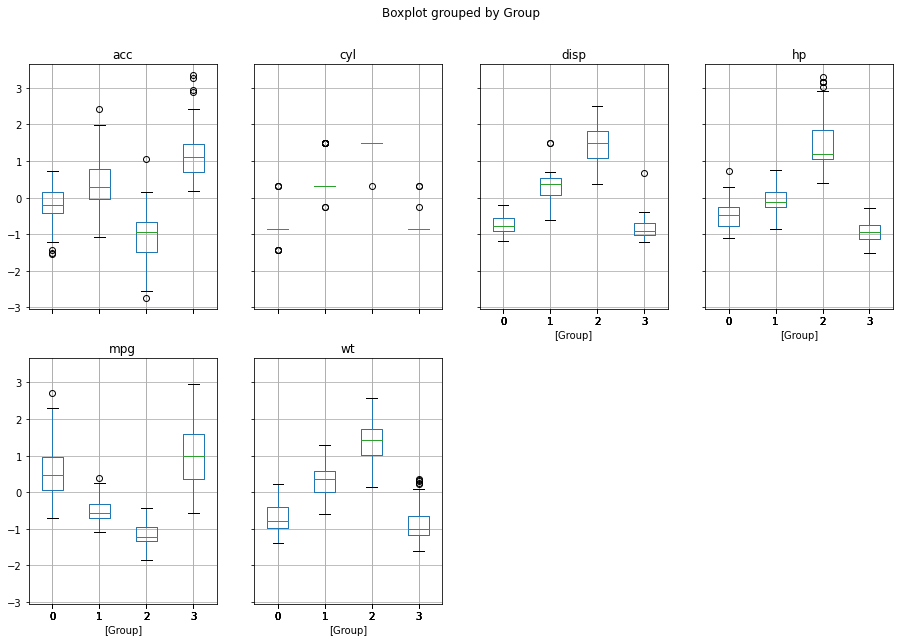

In [95]:
import matplotlib.pyplot as plt

car_mpg_df_attr_z.boxplot(by= "Group", layout=(2,4), figsize=(15,10))

# Identifying and handling outliers

In [97]:
# Address the outlairs at the group level

data= car_mpg_df_attr_z

def replace (group):
    median, std = group.median (), group.std()
    outliers = (group- median).abs()>2*std# Substract median from every member of each group.Take abslute values >2*standar Deviation
    group[outliers]=group.median()
    return group
data_corrected = (data.groupby("Group").transform(replace))
concat_data = data_corrected.join(pd.DataFrame(car_mpg_df_attr_z['Group']))

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[Group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

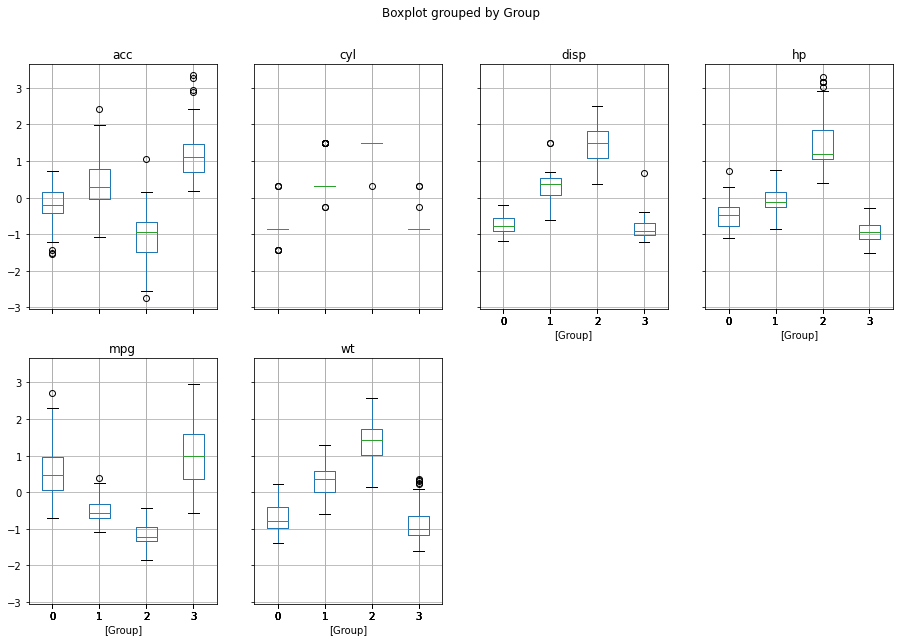

In [98]:
car_mpg_df_attr_z.boxplot(by= "Group", layout=(2,4), figsize=(15,10))

C:\Users\rames\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


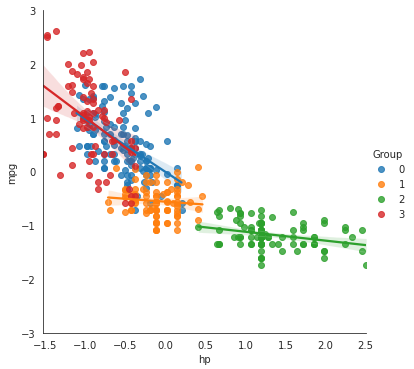

In [99]:
var = 'hp'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'mpg', data=concat_data, hue= "Group")
plot.set(ylim=(-3,3))

C:\Users\rames\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


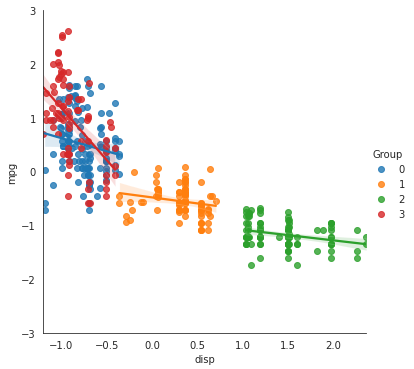

In [100]:
var = 'disp'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'mpg', data=concat_data, hue= "Group")
plot.set(ylim=(-3,3))

C:\Users\rames\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


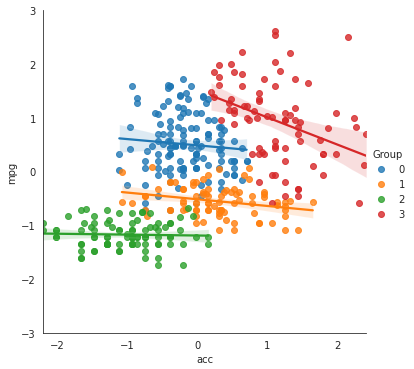

In [101]:
var = 'acc'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'mpg', data=concat_data, hue= "Group")
plot.set(ylim=(-3,3))

In [103]:
from scipy.stats import zscore

car_mpg_df_attr= car_mpg_df.loc[:, "mpg":"origin"]
car_mpg_df_attr_z= car_mpg_df_attr.apply(zscore)

car_mpg_df_attr_z.pop('yr')
car_mpg_df_attr_z.pop('origin')


array = car_mpg_df_attr_z.values

X= array[:,1:5]#select all rows and first 4 clumns which are the atribuits 
y= array[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [127]:
#import binary Regression machine learning library

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=1, max_depth=3)

regressor.fit(X_train, y_train)

feature_importances = regressor.feature_importances_

feature_names = car_mpg_df_attr.columns[1:9]

print (feature_names)

k=8
top_k_idx = feature_importances.argsort()[-k:][::-1]

print(feature_names[top_k_idx], feature_importances)

print (regressor.score(X_train, y_train))
print (regressor.score(X_test, y_test))

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')
Index(['cyl', 'hp', 'wt', 'disp'], dtype='object') [0.74791504 0.01157464 0.19724952 0.04326079]
0.7598358980342992
0.7394218507497639


In [115]:
y_predict = regressor.predict(X_test)

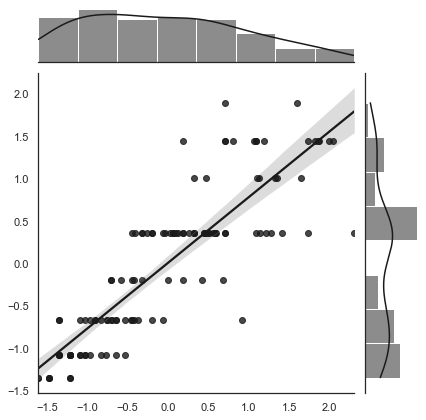

In [118]:
import seaborn as sns

sns.set(style = "darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_predict, kind="reg", color="k")

# Since the distribution on multiple attributes are not axis parallel, let us try SVM regress

In [119]:
from sklearn import svm

clr= svm.SVR(C =15, degree=1, kernel = 'linear')
clr.fit(X_train, y_train)

SVR(C=15, degree=1, kernel='linear')

In [120]:
y_predict=clr.predict(X_test)

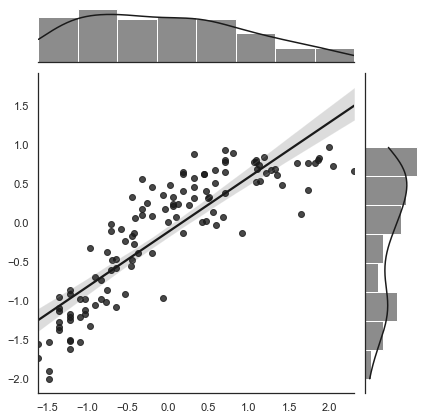

In [121]:
import seaborn as sns

sns.set(style = "darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_predict, kind="reg", color="k")

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, interaction_only=True)

x_poly = poly.fit_transform(x)
x_train, x_test, Y_train, Y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)
x_train.shape

ridge = Ridge(alpha=3)
ridge.fit(x_train, Y_train)
print("Ridge model:", (ridge.coef_))

print (ridge.score(x_train, Y_train))
print (ridge.score(x_test, Y_test))

Ridge model: [ 0.         -0.07318311 -0.04265682 -0.19832947 -0.55011686]
0.686693090865431
0.7500146132062734


In [125]:
lasso= Lasso(alpha=0.1)
lasso.fit(x_train, Y_train)
print ("Lasso Model:", lasso.coef_)

print (lasso.score(x_train, Y_train))
print (lasso.score(x_test, Y_test))


Lasso Model: [ 0.         -0.02985711 -0.00273438 -0.14988458 -0.57216958]
0.675886035978362
0.7370104160190214


In [126]:
regression_model = LinearRegression()

regression_model.fit(x_train, Y_train)

print(regression_model.score(x_train, Y_train))
print(regression_model.score(x_test, Y_test))

0.6869361086963128
0.7497943001341985


In [130]:
regressor = DecisionTreeRegressor(random_state=1)

regressor.fit(x_train, Y_train)
print(regressor.score(x_train, Y_train))
print(regressor.score(x_test, Y_test))

0.9997388230765725
0.5690014570912081
